In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [9]:
#Read the data from given CSV file
Main_Dataset = pd.read_csv("AssignmentResult1_4_Assignment2.csv")
Main_Dataset.head()

,UserId,ItemCode,ItemDescription,NumberOfItemsPurchased,Country
0,278166,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,United Kingdom
1,337701,482370,LONDON BUS COFFEE MUG,3,United Kingdom
2,267099,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,France
3,380478,459186,UNION JACK FLAG LUGGAGE TAG,3,United Kingdom
4,285957,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,United Kingdom


In [10]:
Main_Dataset.shape

(811392, 5)

Count number of unique users in the dataset

In [11]:
Main_Dataset.nunique()

UserId                    4367
ItemCode                  3209
ItemDescription           3895
NumberOfItemsPurchased     308
Country                     37
dtype: int64

As it is a clean data we go further go for prediction

## Item based recommendation system based on product description

In [17]:
product_descriptions1 = Main_Dataset.head(500)
product_descriptions1["ItemDescription"].head(5)

0     FAMILY ALBUM WHITE PICTURE FRAME
1                LONDON BUS COFFEE MUG
2    SET 12 COLOUR PENCILS DOLLY GIRL 
3          UNION JACK FLAG LUGGAGE TAG
4     CUT GLASS T-LIGHT HOLDER OCTAGON
Name: ItemDescription, dtype: object

Feature extraction from product description.
Converting the text in product description into numerical data for analysis

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["ItemDescription"])
X1

<500x615 sparse matrix of type '<class 'numpy.float64'>'
	with 2039 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

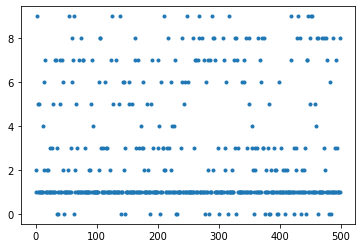

In [19]:
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [21]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [22]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 set
 vintage
 christmas
 blue
 wooden
 box
 bunting
 mini
 large
 clock
Cluster 1:
 retrospot
 red
 bag
 jumbo
 set
 lunch
 charlotte
 box
 shopper
 black
Cluster 2:
 design
 cake
 cases
 60
 pack
 lunch
 bag
 72
 pantry
 vintage
Cluster 3:
 pot
 antique
 trinket
 pudding
 strawberry
 frame
 wooden
 ceramic
 white
 ivory
Cluster 4:
 girl
 12
 dolly
 pack
 tissues
 design
 paisley
 bag
 crayons
 charlotte
Cluster 5:
 metal
 sign
 french
 singing
 lounge
 shed
 blue
 airline
 pottering
 door
Cluster 6:
 light
 holder
 hanging
 glass
 heart
 popcorn
 zinc
 small
 victorian
 stars
Cluster 7:
 pink
 paper
 bunting
 polkadot
 fan
 retrospot
 lace
 doilies
 set
 heart
Cluster 8:
 water
 hot
 bottle
 calm
 come
 doormat
 pad
 carry
 gardeners
 playing
Cluster 9:
 card
 heart
 birthday
 wicker
 fine
 white
 small
 love
 suki
 food


Predicting clusters based on key search words

In [23]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [27]:
show_recommendations("wooden")

Cluster 0:
 set
 vintage
 christmas
 blue
 wooden
 box
 bunting
 mini
 large
 clock


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.